In [2]:
%%capture
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid
import numpy as np
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
box = 'tng100'
snap = [99]
axis = 0
res = 800
files = ['hiptlgrid', 'vngrid', 'hisubhalogrid']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        kmin = (np.abs(rlib.results['pk'][0].xvalues - 2)).argmin()
        master.loadResults(rlib.results['pk'])
print(kmin)

22


In [4]:
smfont = 10
larfont = 12
BOX = rlib.results['pk'][0].props['box']
RES = rlib.results['pk'][0].props['grid_resolution']
cdict = flib.getCdict()
XBORDER, YBORDER = flib.getBorders()
XLIM = flib.getXlim()

The row values for ['space']: ['real', 'redshift']
The column values for ['']: ['no key found']


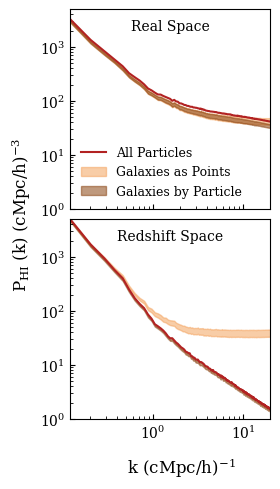

In [5]:

fg = Figrid(master)
XBORDER[0] = 0.3
YBORDER[1] = 0.3
fg.arrange('space', '', panel_length = 2, hspace = 0.05, xborder = XBORDER, yborder = YBORDER)
fg.makeFills({'fieldname':'hisubhalo'}, {'color':cdict['hisubhalo'], 'label':'Galaxies as Points',
        'alpha':0.55})
fg.makeFills({'fieldname':'hiptl'},  {'color':cdict['hiptl'], 'label':'Galaxies by Particle',
        'alpha':0.55})
fg.setPlotArgs({'fieldname':'vn'}, {'color':cdict['vn'], 'label':'All Particles'})
fg.plot()

axkw = {}
axkw['xscale'] = 'log'
axkw['yscale'] = 'log'
axkw['xlim'] = XLIM
axkw['ylim'] = [1, 5000]
fg.setAxisParams(axkw, (0,0))
axkw['ylim'] = [1, 5000]
fg.setAxisParams(axkw, (1,0))

txtkw = {'fontsize':larfont}
flib.pklabels(fg, ysub = r'\rm{HI}', xtxtkw=txtkw, ytxtkw=txtkw)
fg.setRowLabels(['Real Space', 'Redshift Space'], [0.5, 0.95], {'ha':'center', 'va':'top'})

lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (0,0))

fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})


In [5]:
fg.save('HI_auto_pk_FINAL.pdf')

The row values for ['space']: ['real']
The column values for ['']: ['no key found']


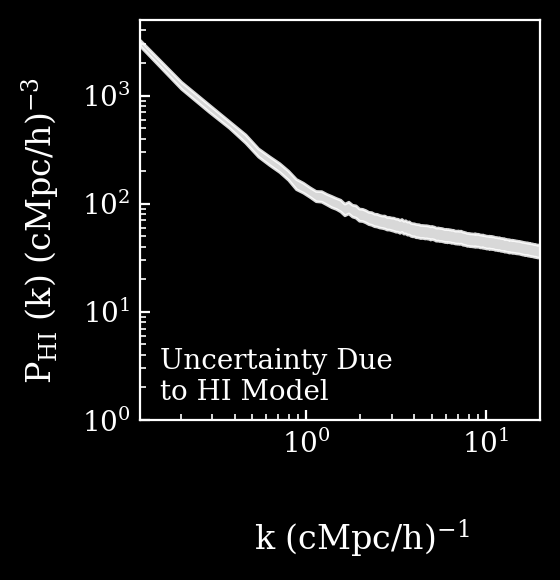

In [9]:
plt.rcParams['axes.edgecolor'] = 'white'
fg = Figrid(DataList(master.getMatching({'space':'real', 'fieldname':['vn', 'hiptl']})))
XBORDER[0] = 0.3
YBORDER[1] = 0.3
fg.arrange('space', '', panel_length = 2, hspace = 0.05, xborder = XBORDER, yborder = YBORDER, dpi = 200)
# fg.makeFills({'fieldname':'hisubhalo'}, {'color':'bisque', 'label':'Galaxies as Points',
#         'alpha':0.55})
# fg.makeFills({'fieldname':'hiptl'},  {'color':'bisque', 'label':'Galaxies by Particle',
#         'alpha':0.85})
fg.makeFills({'is_hydrogen':True},  {'color':'white', 'label':'',
        'alpha':0.85})
# fg.setPlotArgs({'fieldname':'vn'}, {'color':cdict['vn'], 'label':'All Particles'})
fg.plot()
fg.fig.set_facecolor('black')
axkw = {}
axkw['xscale'] = 'log'
axkw['yscale'] = 'log'
axkw['xlim'] = XLIM
axkw['ylim'] = [1, 5000]
axkw['facecolor'] = 'black'
fg.setAxisParams(axkw, (0,0))
# axkw['ylim'] = [1, 5000]
# fg.setAxisParams(axkw, (1,0))

txtkw = {'fontsize':larfont, 'color' : 'white'}
flib.pklabels(fg, ysub = r'\rm{HI}', xtxtkw=txtkw, ytxtkw=txtkw)
# fg.setRowLabels(['Real Space', 'Redshift Space'], [0.5, 0.95], {'ha':'center', 'va':'top'})
ax = fg.axes[0, 0]
# ax.text(0.05, 0.05, 'Galaxies by Particle', transform = ax.transAxes, color = 'bisque')
# ax.text(0.05, 0.15, 'All Particles', transform = ax.transAxes, color = 'firebrick')
ax.text(0.05, 0.05, 'Uncertainty Due\nto HI Model', color = 'white', transform = ax.transAxes)
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
# fg.drawLegend(lkw, (0,0))

# fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in', 'colors':'white'})
fg.fig.savefig('HIauto_combined_pres.png', facecolor = 'black')

The row values for ['space']: ['real']
The column values for ['']: ['no key found']


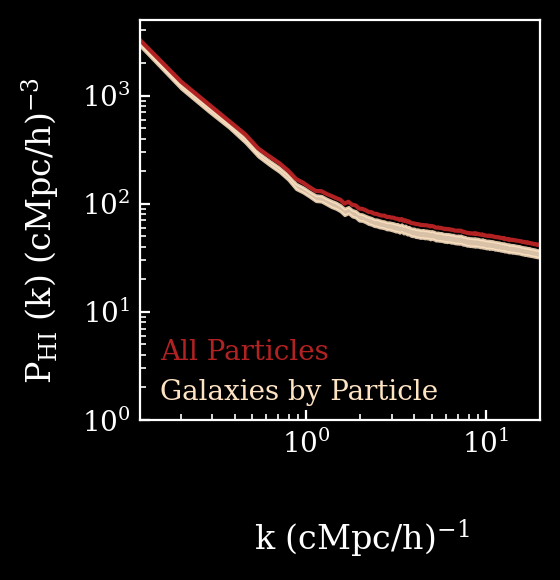

In [10]:
plt.rcParams['axes.edgecolor'] = 'white'
fg = Figrid(DataList(master.getMatching({'space':'real', 'fieldname':['vn', 'hiptl']})))
XBORDER[0] = 0.3
YBORDER[1] = 0.3
fg.arrange('space', '', panel_length = 2, hspace = 0.05, xborder = XBORDER, yborder = YBORDER, dpi = 200)
# fg.makeFills({'fieldname':'hisubhalo'}, {'color':'bisque', 'label':'Galaxies as Points',
#         'alpha':0.55})
fg.makeFills({'fieldname':'hiptl'},  {'color':'bisque', 'label':'Galaxies by Particle',
        'alpha':0.85})

fg.setPlotArgs({'fieldname':'vn'}, {'color':cdict['vn'], 'label':'All Particles'})
fg.plot()
fg.fig.set_facecolor('black')
axkw = {}
axkw['xscale'] = 'log'
axkw['yscale'] = 'log'
axkw['xlim'] = XLIM
axkw['ylim'] = [1, 5000]
axkw['facecolor'] = 'black'
fg.setAxisParams(axkw, (0,0))
# axkw['ylim'] = [1, 5000]
# fg.setAxisParams(axkw, (1,0))

txtkw = {'fontsize':larfont, 'color' : 'white'}
flib.pklabels(fg, ysub = r'\rm{HI}', xtxtkw=txtkw, ytxtkw=txtkw)
# fg.setRowLabels(['Real Space', 'Redshift Space'], [0.5, 0.95], {'ha':'center', 'va':'top'})
ax = fg.axes[0, 0]
ax.text(0.05, 0.05, 'Galaxies by Particle', transform = ax.transAxes, color = 'bisque')
ax.text(0.05, 0.15, 'All Particles', transform = ax.transAxes, color = 'firebrick')
# ax.text(0.05, 0.05, 'Uncertainty Due\nto HI Model', color = 'white', transform = ax.transAxes)
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
# fg.drawLegend(lkw, (0,0))

# fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in', 'colors':'white'})
fg.fig.savefig("HIauto_separate_pres.png", facecolor = 'black')